# Overview


We kick things off with a few more administrative things. 

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend watching and paying attention!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 0: The Admin Stuff 
### (GitHub Page Overview Edition)

Last week, I gave you a lot of practical information about how to follow the class and discussed the principles of how I teach. How each lecture is structured to maximize your learning according to state-of-the-art principles. 

This week, the admin video talks about the structure of the Course Page, which actually contains a lot of useful information. 

You'll notice that I've made it for the class that runs in the spring (Social Data Analysis and Visualization), but the web-page structure is similar, so everyhting should still work.

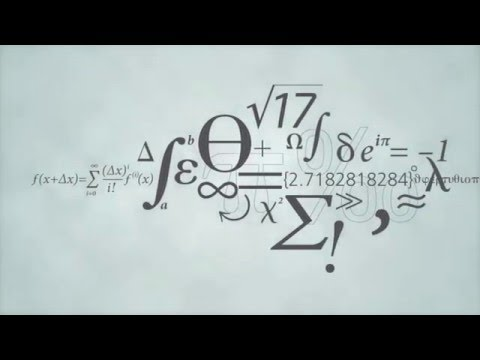

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

For the in-person / video-chat part, I'll talk about the final elements of admin we have to cover for now

* Forming groups
* Handing in assignments
* Peer Evaluations
* The structure of the class

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

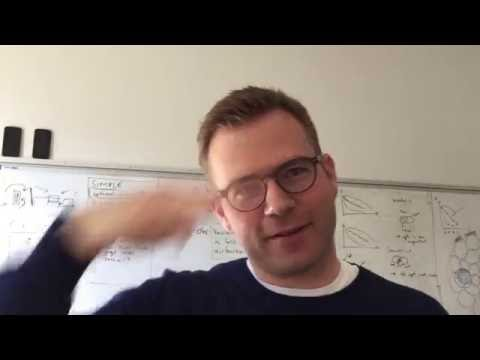

In [ ]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
> 

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book using `NetworkX`

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).
> 

In [ ]:
#### Code here
%%capture
!pip install --upgrade scipy networkxb

UsageError: Line magic function `%%capture` not found.


In [ ]:
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

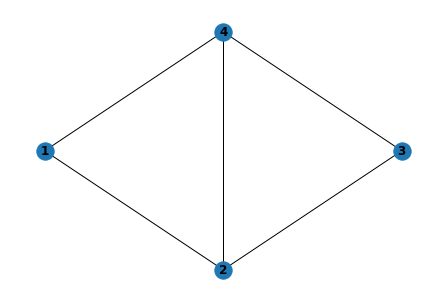

In [ ]:
# 2.1 Create graphs

# Graph a) 
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1, 2), (2, 3),(3,4),(4,1),(4,2)])
nx.draw_shell(G, with_labels=True, font_weight='bold')


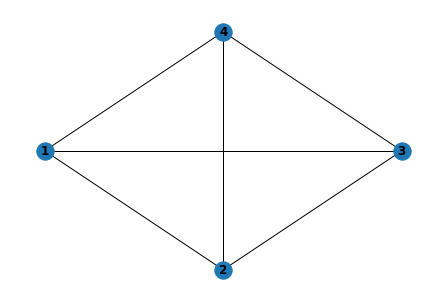

In [ ]:
# Graph b) 
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1, 2), (2, 3),(3,4),(4,1),(4,2),(3,1)])
nx.draw_shell(G, with_labels=True, font_weight='bold')

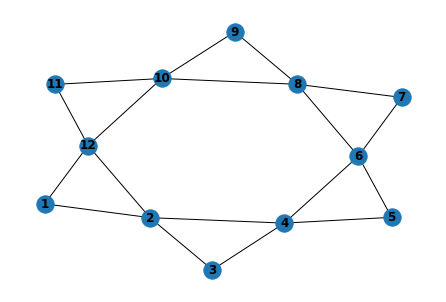

In [ ]:
# Graph c) 
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])
G.add_edges_from([(1, 2), (2, 3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,1),
                 (2,4),(4,6),(6,8),(8,10),(10,12),(12,2) 
                 ])

nx.draw(G, with_labels=True, font_weight='bold')
print(f'The number of edges (links) is: {G.number_of_edges()}')
print(f'The number of nodes is: {G.number_of_nodes()}')

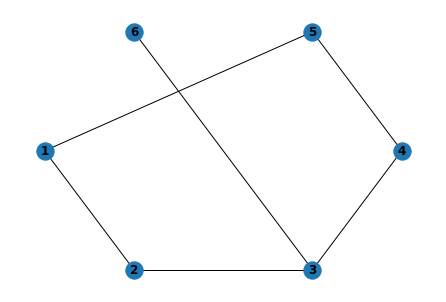

In [ ]:
# Graph d) 
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 2), (2, 3),(3,4),(4,5),(5,1),(3,6),(5,4)        
                 ])

nx.draw_shell(G, with_labels=True, font_weight='bold')
print(f'The number of edges (links) is: {G.number_of_edges()}')
print(f'The number of nodes is: {G.number_of_nodes()}')

In [ ]:
# 2.3

# Network 1 
G1 = nx.Graph()

G1.add_nodes_from([1,2,3,4,5,6])
G1.add_edges_from([(1, 2),(2, 3),(3,1),(3,6),(1,6),(1,4),(1,6),(4,2)])


# Network 2 (directed)
G2 = nx.DiGraph()
G2.add_nodes_from([1,2,3,4,5,6])

G2.add_edge(1, 2)   # adds the nodes in order 2, 1
G2.add_edge(2, 3)
G2.add_edge(3, 2)
G2.add_edge(3, 1)
G2.add_edge(2, 4)
G2.add_edge(4, 1)
G2.add_edge(6, 3)
G2.add_edge(6, 1)

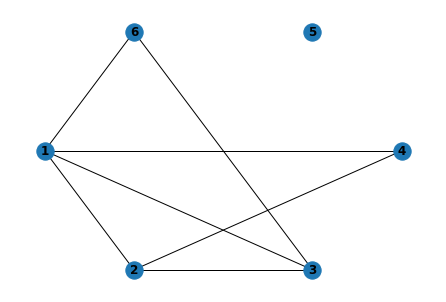

In [ ]:
print('Graph 1')
nx.draw_shell(G1, with_labels=True, font_weight='bold')

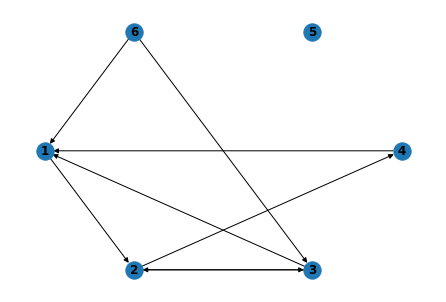

In [ ]:
print('Graph 2: Directed')
nx.draw_shell(G2, with_labels=True, font_weight='bold')

In [ ]:
# Get adjacency matrix
A1 = nx.adjacency_matrix(G1)
print(A1.todense())
print('\n')
A2 = nx.adjacency_matrix(G2)
print(A2.todense())

[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [ ]:
# Link lists 
listG1 = list(G1.edges)
print(listG1)

listG2 = list(G2.edges)
print(listG2)

# Average clustering coefficient
#### The clustering coefficient captures the degree to which the neighbors of a given node link to each other
print(nx.average_clustering(G1))
print(nx.average_clustering(G2))

[(1, 2), (1, 3), (1, 6), (1, 4), (2, 3), (2, 4), (3, 6)]
[(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (4, 1), (6, 3), (6, 1)]
0.6388888888888888
0.32222222222222224


> What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?
>> *We can't see if the network is sparse with just a list of links.If there are very little ones in. the matrix then the network doesn't have Lmax, and though is sparse.*

In [ ]:
for path in nx.all_simple_paths(G1, source=1, target=3):
    print(f'Simple path of G1 from 1-3: {path}')

Simple path of G1 from 1-3: [1, 2, 3]
Simple path of G1 from 1-3: [1, 3]
Simple path of G1 from 1-3: [1, 6, 3]
Simple path of G1 from 1-3: [1, 4, 2, 3]


In [ ]:
for path in nx.all_simple_paths(G2, source=1, target=3):
    print(f'Simple path of G1 from 1-3: {path}')

Simple path of G1 from 1-3: [1, 2, 3]


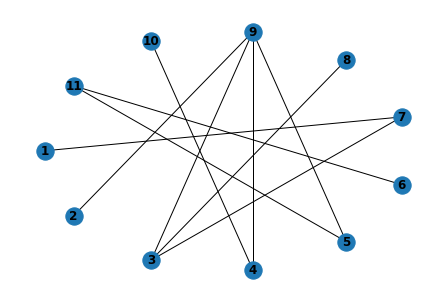

In [ ]:
# 2.5 

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4,5,6], bipartite=0)
B.add_nodes_from([7, 8, 9,10,11], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 7),
                (2, 9),
                   (3,7),(3,8),(3,9),
                   (4,9),(4,10),
                   (5,9),(5,11),
                   (6,11)])

nx.draw_shell(B, with_labels=True, font_weight='bold')

In [ ]:
# Get adjacency matrix
AB = nx.adjacency_matrix(B)
print(AB.todense())

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


> Why is it a block diagonal matrix?
>> *???*

In [ ]:
# Adjacency matrix of its two projections, purple and green nodes
from networkx.algorithms import bipartite
purple_nodes, green_nodes = bipartite.sets(B)

purpleG = bipartite.projected_graph(B, purple_nodes)
greenG = bipartite.projected_graph(B, green_nodes)

# Get adjacency matrix projection purple
AB_purple = nx.adjacency_matrix(purpleG)
print(AB_purple.todense())

print('\n')
# Get adjacency matrix projection green
AB_green = nx.adjacency_matrix(greenG)
print(AB_green.todense())

[[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]


[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [ ]:
#degree()
## This functinon prints the the degree of each of the nodes in the graph B
print('Purple Nodes average degree')
print(list(B.degree(list(purple_nodes))))
print('Green nodes average degree')
print(list(B.degree(list(green_nodes))))

Purple Nodes average degree
[(1, 1), (2, 1), (3, 3), (4, 2), (5, 2), (6, 1)]
Green nodes average degree
[(7, 2), (8, 1), (9, 4), (10, 1), (11, 2)]


In [ ]:
avg_degree_purple_nodes = (2*purpleG.number_of_edges()) /purpleG.number_of_nodes()
avg_degree_purple_nodes

2.6666666666666665

In [ ]:
avg_degree_green = (2*greenG.number_of_edges()) /greenG.number_of_nodes()
avg_degree_green

2.0

In [ ]:
avg_degree_purple_proj =(purpleG.number_of_edges()) /purpleG.number_of_nodes()
avg_degree_purple_proj

1.3333333333333333

In [ ]:
avg_degree_green_proj = (greenG.number_of_edges()) /greenG.number_of_nodes()
avg_degree_green_proj

1.0

>Is it surprising that the values are different from those obtained in point (c)?
>> ??

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

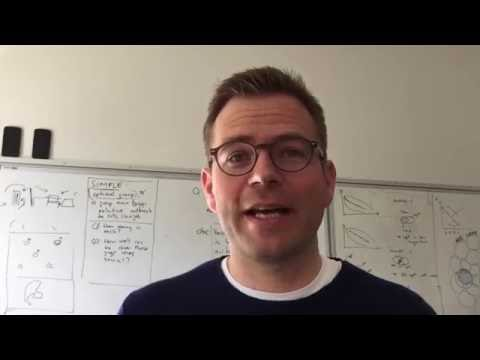

In [ ]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450)

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.


> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

In [ ]:
import matplotlib.pyplot as plt
import random
import networkx as nx

#Generate random  number with Gaussian distribution

n = 5000
mu =2
sigma = 0.125

nums=[]
    
for i in range(n): 
    temp = random.gauss(mu, sigma)
    nums.append(temp) 
        




In [ ]:
bin = np.histogram(nums, bins = 10)
print(f' Lenght \n - array 1 = {len(bin[0])}\n - array 2 = {len(bin[1])}')


The function returned the values of the histogramm and bin edges 

In [ ]:
x = [(bin[1][i] + bin[1][i+1])/2 for i in range(len(bin[1]) - 1)  ]
plt.plot(x,bin[0])

In [ ]:
#random numbers with Poisson distribution

lambd = 10
N = 5000

num_poi = np.random.poisson(lambd, N)

max = np.max(num_poi)
min = np.min(num_poi)

print(f' Maximum value  = {max}, minimum value = {min}')

A vector v that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number.

In [ ]:
v = [i for  i in range(min,max+1)]

poisson_hist = np.histogram(num_poi, bins = v)

print(f' Lenght \n - array 1 = {len(poisson_hist[0])}\n - array 2 = {len(poisson_hist[1])}')

We get 23 bins

In [ ]:
plt.bar(poisson_hist[1][:-1], height=poisson_hist[0])

In [ ]:
k = 10
N = 5000

p = k / (N -1)
print(f'p = {p}')

In [ ]:
ER_graph = nx.erdos_renyi_graph(N, p)
nx.draw_shell(ER_graph)
plt.show()

In [ ]:

degree_sequence = sorted((d for n, d in ER_graph.degree()), reverse=True)
dmax = np.max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes




plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

plt.show()

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

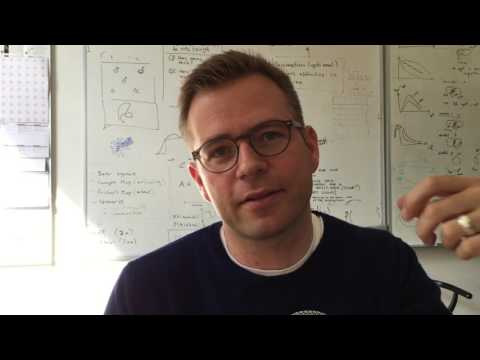

In [ ]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450)

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

In [ ]:
import numpy as np
N = 3000
p = 1e-3

In [ ]:
#Expected number of links? L
var = (N*(N-1))/2
L = p * var
print(f'Expected number of links L: {L}')

Expected number of links L: 4498.5


In [ ]:
#In which regime is the network? 
k = p*(N-1)
print(f'The value of k is: {k}')
# Connected regime ? or supercritial regime?
k_cr = np.log(N)
print(f'And ln(N)= k_cr = {k_cr}')

print('In our case, since k < ln(N) so we are in supercritical regime')

The value of k is: 2.999
And ln(N)= k_cr = 8.006367567650246
In our case, since k < ln(N) so we are in supercritical regime


In [ ]:
#Calculate the probability pc so that the network is at the critical point
p_c = 1/(N-1)
print(f'At the critical point, k = 1, therefore the probability is {p_c}')

At the critical point, k = 1, therefore the probability is 0.00033344448149383126


In [ ]:
#Given the linking probability p = 10–3, 
#calculate the number of nodes Ncr so 
#that the network has only one component (N_g)

# p is given and pc is 1/N as in eq (3.11)

#N_g = 
#N_g


In [ ]:
#For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.
N = 9000
G = nx.erdos_renyi_graph(N, p)
k_cr = np.log(N)
k_cr


k_avg = p*(N-1)
print(f'The average degree k: {k_avg}')
# average distance
d_avg = np.log(N)/np.log(k_avg)
print(f'The average distance between two random nodes {d_avg}')

The average degree k: 8.999
The average distance between two random nodes 4.144064483635564


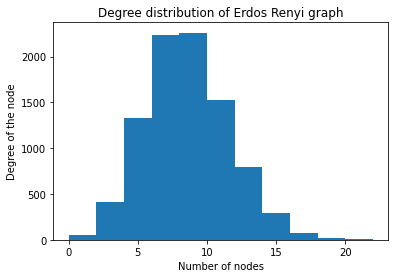

In [ ]:
from matplotlib import pyplot as plt
#Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).
k = 5
np.exp(-k_avg)*k_avg**k/np.math.factorial(k)

x = [val for (node, val) in G.degree()]
counts, edges = np.histogram(x, bins=11)
plt.bar(edges[:-1], counts, width=np.diff(edges))
plt.title("Degree distribution of Erdos Renyi graph")
plt.xlabel('Number of nodes')
plt.ylabel('Degree of the node')
plt.show()

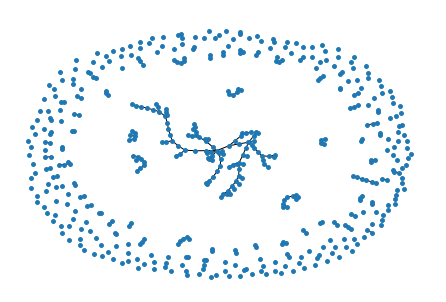

In [ ]:
#Generating Erdős-Rényi Networks
# Relying on the G(N, p) model, 
# generate with a computer three networks with N = 500 nodes 
# and average degree (a) 〈k〉 = 0.8, (b) 〈k〉 = 1 and (c) 〈k〉 = 8. 
# Visualize these networks.


k_avg = 0.8 ## change here 0.8,1,8
N= 500
p = k_avg/(N-1)
G = nx.erdos_renyi_graph(N, p)

# to draw it pretty 
nx.draw(G, 
        with_labels = False, 
        node_size =15)

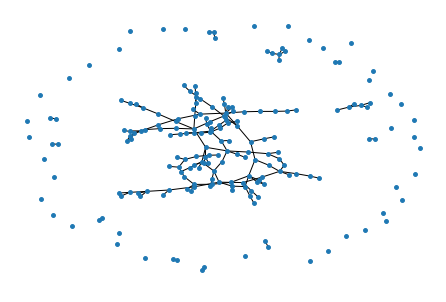

In [ ]:
## 2nd part 
k_avg = 1.5
N= 200
p = k_avg/(N-1)
G = nx.erdos_renyi_graph(N, p)

# to draw it pretty 
nx.draw(G, 
        with_labels = False, 
        node_size =15)


In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
GCC = G.subgraph(largest_cc).copy()

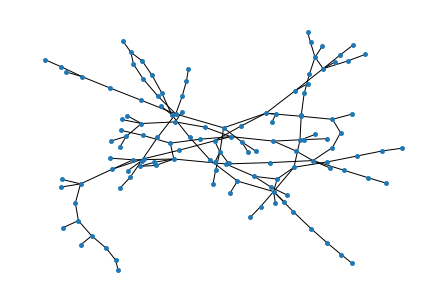

In [ ]:
nx.draw(
    GCC,
    with_labels = False,
    node_size = 15
)

In [ ]:
#random node selection
rd_node = np.random.choice(GCC.nodes)
print(f'The random node is: {rd_node}')

#shortest paths from the random node
print('The shortest paths:')
nx.single_source_shortest_path(G,rd_node,2)

The random node is: 155
The shortest paths:


{155: [155],
 1: [155, 1],
 7: [155, 7],
 81: [155, 81],
 98: [155, 98],
 194: [155, 194],
 174: [155, 1, 174],
 36: [155, 7, 36],
 60: [155, 7, 60],
 193: [155, 81, 193],
 20: [155, 98, 20],
 66: [155, 98, 66],
 97: [155, 98, 97],
 113: [155, 194, 113]}

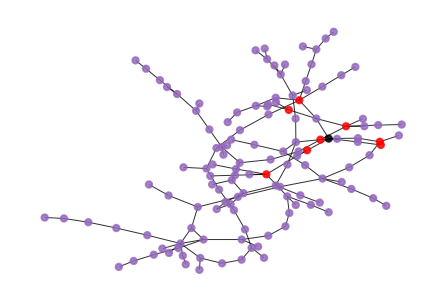

In [ ]:
# Choose the ones 2 nodes ahead from the previous list

val_map = {155: "black",
           174: "red",
          36: "red",
          60: "red",
          193: "red",
          20: "red",
          66: "red",
          97: "red",
          113: "red",
          }

values = [val_map.get(node, "#9467bd") for node in GCC.nodes()]


nx.draw(
    GCC,
    with_labels = False,
    node_size = 40,
    node_color=values,
    alpha = 0.8,
    linewidths=2,
    edge_color = 'black',
    
)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d3b23c38-3361-49e4-90c4-a3542fc22751' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>